<h1>hello and welcome to my cw1 for optimisation

imports and setters.

set the seed for random number generators here

In [41]:
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt

seed = 1234567
rng = np.random.default_rng(seed)

g1_calls = 0
g1_test_calls = 0
g2_calls = 0
g2_test_calls = 0
g3_calls = 0
g3_test_calls = 0
g4_calls = 0
g4_test_calls = 0
g5_calls = 0
g5_test_calls = 0
g6_calls = 0
g6_test_calls = 0
g7_calls = 0
g7_test_calls = 0


constraint testing functions for marks

In [42]:
def g1_test(x):
    global g1_test_calls
    g1_test_calls += 1
    return 101000 - w(x)

def g2_test(x):
    global g2_test_calls
    g2_test_calls += 1
    return p0(x) - 1000

def g3_test(x):
    global g3_test_calls
    g3_test_calls += 1
    return dt(x) - 50

def g4_test(x):
    global g4_test_calls 
    g4_test_calls += 1
    return 0.001 - h(x)

def g5_test(x):
    global g5_test_calls 
    g5_test_calls += 1
    return x[1] - x[2]

def g6_test(x):
    global g6_test_calls 
    g6_test_calls += 1
    return ((0.0307 * x[0]) / (772.8 * m.pi * p0(x) * h(x) * x[2])) - 0.001

def g7_test(x):
    global g7_test_calls 
    g7_test_calls += 1
    return (w(x) / (m.pi * (x[2]**2 - x[1]**2))) - 5000

#implement the other parameters
def p(x):
    return (np.log10(np.log10(8.122 * x[3] + 0.8)) - 10.04) / - 3.55

def dt(x):
    return 2 * (10**(p(x)) - 560)

def ef(x):
    return 143.308 * dt(x) * x[0]

def h(x):
    return ((1500 * m.pi) / 60)**2 * ((2 * 10**(-6) * m.pi * x[3]) / ef(x)) * (
        (x[2]**4 / 4) - (x[1]**4 / 4))
    
def p0(x):
    return ((6 * 10**(-6) * x[3] * x[0])/m.pi * h(x)**3) * (np.log(x[2] / x[1]))

def w(x):
    return ((m.pi * p0(x)) / 2) * ((x[2]**2 - x[1]**2) / np.log(x[2] / x[1]))

task 1: constraint functions that only return a bool

In [43]:
def g1(x):
    global g1_calls
    g1_calls += 1
    return 101000 - w(x) <= 0

def g2(x):
    global g2_calls
    g2_calls += 1
    return p0(x) - 1000 <= 0

def g3(x):
    global g3_calls
    g3_calls += 1
    return dt(x) - 50 <= 0

def g4(x):
    global g4_calls 
    g4_calls += 1
    return 0.001 - h(x) <= 0

def g5(x):
    global g5_calls 
    g5_calls += 1
    return x[1] - x[2] <= 0

def g6(x):
    global g6_calls 
    g6_calls += 1
    return ((0.0307 * x[0]) / (772.8 * m.pi * p0(x) * h(x) * x[2])) - 0.001 <= 0

def g7(x):
    global g7_calls 
    g7_calls += 1
    return (w(x) / (m.pi * (x[2]**2 - x[1]**2))) - 5000 <= 0

#implement the other parameters
def p(x):
    return (np.log10(np.log10(8.122 * x[3] + 0.8)) - 10.04) / -3.55

def dt(x):
    return 2 * (10**(p(x)) - 560)

def ef(x):
    return 143.308 * dt(x) * x[0]

def h(x):
    return ((1500 * m.pi) / 60)**2 * ((2 * 10**(-6) * m.pi * x[3]) / ef(x)) * (
        (x[2]**4 / 4) - (x[1]**4 / 4))
    
def p0(x):
    return ((6 * 10**(-6) * x[3] * x[0])/m.pi * h(x)**3) * (np.log(x[2] / x[1]))

def w(x):
    return ((m.pi * p0(x)) / 2) * ((x[2]**2 - x[1]**2) / np.log(x[2] / x[1]))

#the main function
def func(x):
    return ((p0(x) * x[0]) / 0.7) + ef(x)

def alltrue(x):
    return g1(x) and g2(x) and g3(x) and g4(x) and g5(x) and g6(x) and g7(x)

test the constraints are properly implemented

In [44]:
x = np.array([4.19, 11.57, 6.69, 10.65])
print(func(x))
print(g1_test(x))
print(g2_test(x))
print(g3_test(x))
print(g4_test(x))
print(g5_test(x))
print(g6_test(x))
print(g7_test(x))

-1784.0772106526924
101000.00930833019
-1000.0000364296213
-52.97118117373543
-0.9196377239881502
4.88
-0.23713799445401706
-4999.99996674926


implement random search to find min of function

w_gen function finds true inputs first before finding the minimum.

input: number of true values to find

no_gen function calculates "its" number of random values and then finds true inputs after

input: number of iterations to try and find true values

In [45]:
'''
def gentruex():
    its = 0
    while True:
        x = np.random.uniform(1, 16, 4)
        its += 1
        if alltrue(x):
            print('good input found after', its, 'iterations:\n', x)
            return x
        
def rand_search_w_gen(its):
    print('running random search for', its, 'iterations')
    for i in range(its):
        x = gentruex()
        if i == 0:
            bestx = x
            bestf = func(x)
        else:
            if func(x) < bestf:
                bestx = x
                bestf = func(x)
    return bestf, bestx
'''

def rand_search_no_gen(its):
    trueresults = []
    for i in range(its):
        x = rng.uniform(1, 16, 4)
        if alltrue(x):
            result = [x, func(x)]
            trueresults.append(result)
    if len(trueresults) == 0:
        print('RS: no true inputs found')
        return None,None
    else:
        print('RS: best found!')
        return min(trueresults, key=lambda x: x[1])

run random search

In [46]:
#optimal = rand_search_no_gen(10000)
#print('optimal input: ', optimal[0], '\noutput: ', optimal[1])


implement simulated annealing 

In [47]:
#log cooling function
def logarithmic_cooling(initial_temp, current_iteration):
    return initial_temp / np.log2(2 + current_iteration)

#exponential cooling function
def exponential_cooling(initial_temp, current_iteration):
    return initial_temp * 0.95**current_iteration

#linear cooling function
def linear_cooling(initial_temp, current_iteration):
    #lol current iteration does nothing!!
    return initial_temp - 0.0001

#quadratic cooling function
def quadratic_cooling(initial_temp, current_iteration):
    return initial_temp - 0.0001 * current_iteration**2

#acceptance function
def acceptance_function(current_cost, new_cost, temperature):
    if new_cost < current_cost:
        return 1
    else:
        return np.exp((current_cost - new_cost) / temperature)

#simulated annealing algorithm
def simulated_annealing(its, temp, cooling, sd):
    #set an initial random x
    xbest = rng.uniform(1, 16, 4)
    #set the overall best x to the initial x
    overallbest = xbest
    for i in range(its):
        #make a new x based on the normal distribution around the current x
        xnew = xbest + rng.standard_normal(4) * sd
        #calculate results for the new x and the current best x
        resultnew = func(xnew)
        resultbest = func(xbest)
        #check if constraints are met
        if alltrue(xnew):
            #check if the new x is better than the current best
            if (resultnew < resultbest):
                overallbest = xnew
            #if not, check if the new x is accepted based on the acceptance function
            else:
                if rng.random() < acceptance_function(resultbest, resultnew, temp):
                    xbest = xnew
        #cool the temperature
        temp = cooling(temp, i)

    #check if the final x meets the constraints
    if alltrue(overallbest):
        print('SA: best found!')
        return overallbest, func(overallbest)
    #if it does, return the final x and its output
    else:
        print('SA: no true inputs found')
        return None, None

run simulated annealing

In [48]:
#optimal = simulated_annealing(100000, 1000, exponential_cooling, 4)
#print('optimal input: ', optimal[0], '\noutput: ', optimal[1])

run each 21 times and collect results

In [49]:
rs_inputs = []
rs_results = []
sa_inputs = []
sa_results = []
for i in range(21):
    print('iteration', i)
    rs_result = rand_search_no_gen(10000)
    if rs_result[1] != None:
        rs_results.append(rs_result[1])
        rs_inputs.append(rs_result[0])
    sa_result = simulated_annealing(10000, 1000, logarithmic_cooling, 3)
    if sa_result[1] != None:
        sa_results.append(sa_result[1])
        sa_inputs.append(sa_result[0])
print('done!')

iteration 0
RS: no true inputs found


C:\Users\tvern\AppData\Local\Temp\ipykernel_11240\3330514049.py:51: RuntimeWarning: invalid value encountered in log
  return ((6 * 10**(-6) * x[3] * x[0])/m.pi * h(x)**3) * (np.log(x[2] / x[1]))
C:\Users\tvern\AppData\Local\Temp\ipykernel_11240\3330514049.py:54: RuntimeWarning: invalid value encountered in log
  return ((m.pi * p0(x)) / 2) * ((x[2]**2 - x[1]**2) / np.log(x[2] / x[1]))


SA: no true inputs found
iteration 1
RS: no true inputs found


C:\Users\tvern\AppData\Local\Temp\ipykernel_11240\3330514049.py:38: RuntimeWarning: invalid value encountered in log10
  return (np.log10(np.log10(8.122 * x[3] + 0.8)) - 10.04) / -3.55


SA: no true inputs found
iteration 2
RS: no true inputs found
SA: best found!
iteration 3
RS: best found!


C:\Users\tvern\AppData\Local\Temp\ipykernel_11240\586210894.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return np.exp((current_cost - new_cost) / temperature)


SA: best found!
iteration 4
RS: no true inputs found
SA: no true inputs found
iteration 5
RS: no true inputs found
SA: no true inputs found
iteration 6
RS: best found!
SA: no true inputs found
iteration 7
RS: no true inputs found
SA: no true inputs found
iteration 8
RS: no true inputs found
SA: no true inputs found
iteration 9
RS: no true inputs found
SA: best found!
iteration 10
RS: no true inputs found
SA: no true inputs found
iteration 11
RS: no true inputs found
SA: no true inputs found
iteration 12
RS: no true inputs found
SA: no true inputs found
iteration 13
RS: no true inputs found
SA: no true inputs found
iteration 14
RS: no true inputs found
SA: no true inputs found
iteration 15
RS: no true inputs found
SA: no true inputs found
iteration 16
RS: best found!
SA: no true inputs found
iteration 17
RS: no true inputs found
SA: no true inputs found
iteration 18
RS: no true inputs found
SA: no true inputs found
iteration 19
RS: no true inputs found
SA: no true inputs found
iteration

plot the graphs

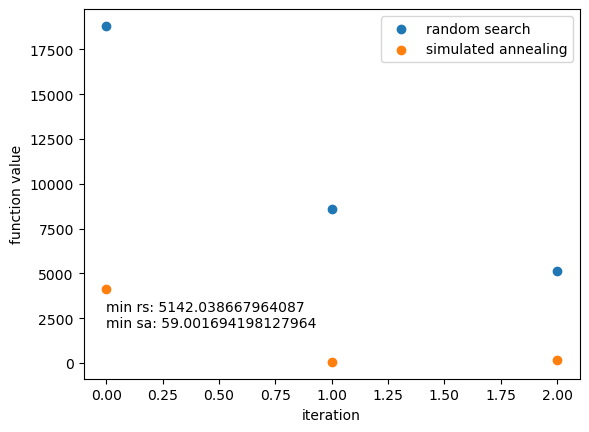

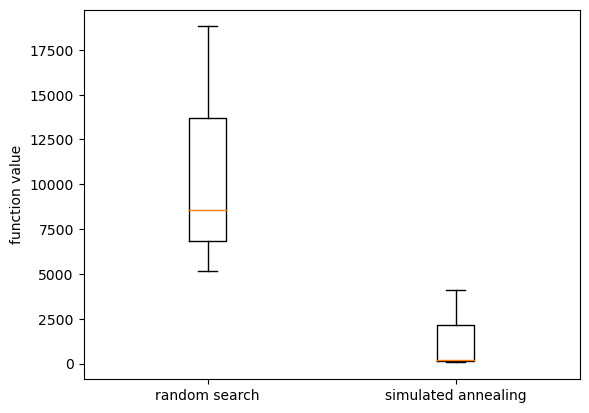

In [50]:
#plot the results of both algorithms
plt.scatter(range(len(rs_results)), rs_results, label='random search')
plt.scatter(range(len(sa_results)), sa_results, label='simulated annealing')
plt.xlabel('iteration')
plt.ylabel('function value')
# write the minimum for both sa and rs on the side of the graph on the top right
plt.text(0, 2000, 'min rs: ' + str(min(rs_results)) + '\nmin sa: ' + str(min(sa_results)))
#write a key for the colours
plt.legend()
plt.show()

#plot two box plots for each algorithm, one for sa and one for rs
plt.figure()
plt.boxplot([rs_results, sa_results], labels=['random search', 'simulated annealing'])
plt.ylabel('function value')
plt.show()


After 21 runs of each optimizer and analyzing their performance by plotting their outputs on a graph, I cannot draw any comparisons between the two algorithms. It seems that the harsh constraints applied to the inputs, particularly g1, prevent most of the solutions from both algorithms from being accepted. So even with 21 repetitions of 10,000 iterations of each algorithm, only a couple of solutions from each algorithm are found, and sometimes none at all. If the constraints weren't so harsh/complex or the dimensions were reduced, perhaps simulated annealing could be more efficient at finding a solution. More iterations of the algorithms could also make it easier to analyze the outputs of each of them.

Despite this, based on the data we have, it seems like random search is more erratic in its outputs given the increased range. It is also more likely to find a solution that satisfies the constraints, given the random nature of the algorithm.

For simulated annealing, it seems less likely to find a result because the algorithm does not take into account the multi-dimensional nature of the input. It could perhaps try to iterate individually over each dimension, but it is not certain if this could work better at finding solutions as the constraints cross over dimensions and affect one another.

